In [19]:
import operator

from sklearn import linear_model, metrics, datasets
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from itertools import islice
from sklearn.linear_model import LinearRegression

# TODO START

ooooooooooo


**load_digits** - dataset изображений рукописных цифр
* `Строка/Объект` - изображение `цифр`
* `Столбцы` - это `пиксели`
* `Значения` в столбцах - `яркость` пикселей
* `Картинка` - `2-х мерный` массив чисел `8 х 8`
    * каждая `ячейка` массива = `один пиксель`
    *  значение в `ячейке` = `яркость` этого `пикселя` (обычно от `0 до 1` или от `0 до 255`)

In [15]:
# TODO достаём dataset, load_digits - изображение 8х8 развёрнутое в вектор (1, 64)

data_digit = load_digits()

data = datasets.load_digits()
image = data.images.reshape(data.images.shape[0], -1)  # data преобразованная из матрицы в вектор признаков

print('Матрица : \n', data.images[0])
print('Вектор : \n', image[0])

# TODO transform в DF
df = pd.DataFrame(data=data.data, columns=data.feature_names)

print('Содержание load_digits : \n', data.keys())

# TODO Целевая и признаки
print(data.target.shape)
print(data.data.shape)

# TODO распаковка изображения из строки в матрицу
imgs = image.reshape(image.shape[0], 8, 8)

# print(imgs[:1].reshape(8, 8))

# plt.imshow(imgs[:1].reshape(8, 8))

# TODO кол-во уникальных значений в target
# data['target']
print('Уникальные значения target : \n', np.unique(data.target))

print('Максимальное значение яркости пикселя : ', np.max(data.data))


Матрица : 
 [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
Вектор : 
 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
Содержание load_digits : 
 dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
(1797,)
(1797, 64)
Уникальные значения target : 
 [0 1 2 3 4 5 6 7 8 9]
Максимальное значение яркости пикселя :  16.0



**plt в цикле**

*в imshow подаём матрицу*
* `subplots` - должен быть `вне цикла`, 
* выводим 2 картинки

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]


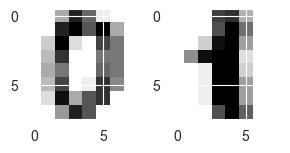

(2, 8, 8)


In [16]:
# TODO plt в цикле, subplots - должен быть вне цикла, выводим 3 картинки

fig, axes = plt.subplots(1, 2, figsize=(3, 3))
for n, img in enumerate(imgs[:2]):
    print(img)
    axes[n].imshow(img, cmap=plt.cm.binary)

plt.tight_layout()  # Обрезка картинки под размеры графика 
plt.show()

print(imgs[:2].shape)

**Вывод заданного числа картинок** 

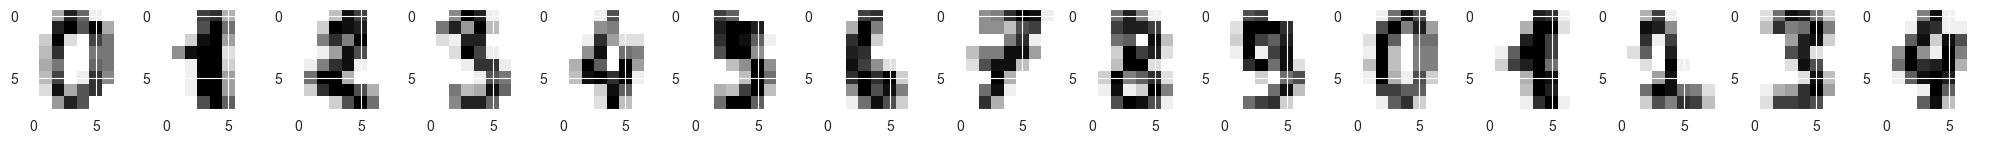

In [17]:
# TODO вывод заданного кол-ва объектов

m = 15
fig, axes = plt.subplots(1, m, figsize=(20, 20))
for k, img in enumerate(imgs[:m]):
    axes[k].imshow(img, cmap=plt.cm.binary)
plt.tight_layout()
plt.show()

**Вывод из load_digits нескольких изображений заданной цифр**

In [ ]:
# TODO вывод заданных чисел

num_image = 100  # Число объектов из которых извлечём изображения чисел
ln = 10 # Длина разбиения объектов датасета от 0 до 9
idx = 3  # Число которое выводим, по факту Индекс Значения из разбитых на отрезки объектов
val = imgs[:num_image]  #  Часть data для отображения
subplt = int(len(val) / ln)  # Число выводимых картинок, количество столбцов в subplots
fig, axes = plt.subplots(1, subplt, figsize=(10, 10))
for n in range(0, len(val), ln):
    ax = int(n / ln)
    imgs_part = imgs[:num_image][n: n + ln][idx]
    axes[ax].imshow(imgs_part, cmap=plt.cm.binary)

plt.show()


**Разделение, fit, predict**
* В мо
* `X_train` и `X_test` по `0,5` так как `мало` данных
* Что бы `оценить` качество берём `по больше` для `X_test`

In [35]:
# TODO разделение + fit + predict

# data = datasets.load_digits()

X, y = data.data, data.target

# X, y = data_digit["data"], data_digit["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=42)
# data['target']
print(X.shape)
print(X_train.shape, X_test.shape)

model = KNeighborsClassifier(n_neighbors=5, algorithm='brute', weights='distance')
# model = KNeighborsClassifier(algorithm='brute')

model.fit(X_train, y_train)

# y_pred = model.predict(X[201:202])  # Предсказание объекта 201

# print('Предсказание объекта 201 : ', y_pred)

y_pred = model.predict(X_test)
print(f'Предсказания для  {y_pred.shape[0]} объектов X_test')
print('Первые 10 predict : ', y_pred[:10])


# TODO predict_proba
# y_prob = model.predict_proba(X)
# print(y_prob[:10])


# dfy = pd.DataFrame(y_pred)


print(y_pred.shape)

(1797, 64)
(898, 64) (899, 64)
Предсказания для  899 объектов X_test
Первые 10 predict :  [6 9 3 7 2 1 5 2 5 2]
(899,)


**Метрики качества KNN**

In [38]:
# TODO Метрики качества KNN, возвращает таблицу

target_names = [f'class {i}' for i in list(range(10))]
labels = [j for j in range(0, 100, 10)]
print(classification_report(y_test, y_pred, target_names=target_names))

# TODO возвращает словарь 1
report_dict = classification_report(y_test, y_pred, output_dict=True)

# TODO выводим срез словаря
print(list(islice(report_dict.items(), 3))) # Срез Словаря



              precision    recall  f1-score   support

     class 0       0.99      1.00      0.99        82
     class 1       0.97      1.00      0.98        89
     class 2       1.00      1.00      1.00        83
     class 3       0.99      0.95      0.97        93
     class 4       0.99      1.00      0.99        93
     class 5       0.99      0.96      0.97        99
     class 6       0.99      0.99      0.99        98
     class 7       0.97      1.00      0.98        87
     class 8       0.95      0.94      0.95        83
     class 9       0.96      0.96      0.96        92

    accuracy                           0.98       899
   macro avg       0.98      0.98      0.98       899
weighted avg       0.98      0.98      0.98       899

[('0', {'precision': 0.9879518072289156, 'recall': 1.0, 'f1-score': 0.993939393939394, 'support': 82.0}), ('1', {'precision': 0.967391304347826, 'recall': 1.0, 'f1-score': 0.9834254143646408, 'support': 89.0}), ('2', {'precision': 1.0, 'reca

**Испортим качество для отслеживания метрик**

In [ ]:
model = KNeighborsClassifier(n_neighbors=500, algorithm='brute')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


**Матрица ошибок - confusion matrix**
* `normalize='true'` - правильно классифицированные в %

[[82  0  0  0  0  0  0  0  0  0]
 [ 0 89  0  0  0  0  0  0  0  0]
 [ 0  0 83  0  0  0  0  0  0  0]
 [ 0  0  0 88  0  0  0  2  3  0]
 [ 0  0  0  0 93  0  0  0  0  0]
 [ 0  0  0  0  0 95  1  0  0  3]
 [ 1  0  0  0  0  0 97  0  0  0]
 [ 0  0  0  0  0  0  0 87  0  0]
 [ 0  3  0  0  0  0  0  1 78  1]
 [ 0  0  0  1  1  1  0  0  1 88]]


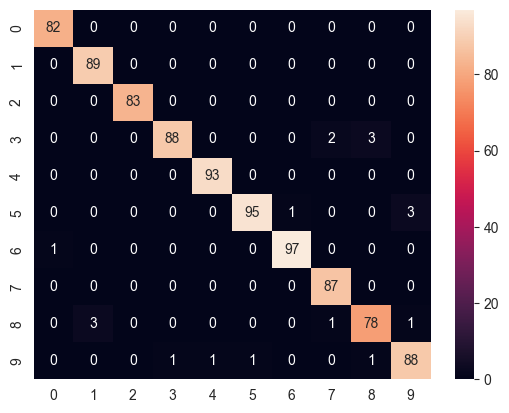

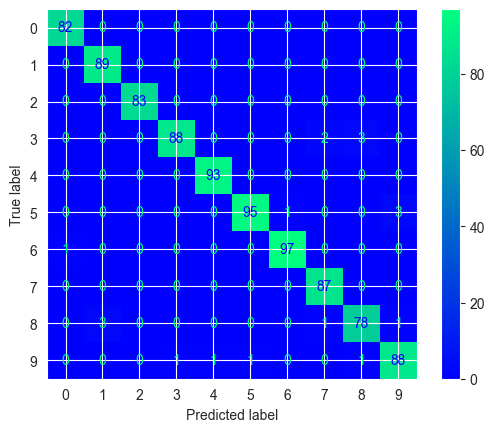

In [39]:
# TODO Матрица ошибок - confusion matrix

conf_mtx = np.round(confusion_matrix(y_test, y_pred), 2)

#  TODO Предаём матрицу ошибок для визуализации
display = ConfusionMatrixDisplay(confusion_matrix=conf_mtx)

print(conf_mtx)

# TODO строим с seaborn
sns.heatmap(conf_mtx, annot=True)
plt.show()
# TODO строим с plt

fig, ax = plt.subplots()
display.plot(ax=ax, xticks_rotation='horizontal', cmap='winter')
plt.show()



**f1-score, macro avg и средневзвешенное weighted avg Считаем Руками**
* Взвешенная f1 - мера

In [40]:
# TODO  f1-score и macro avg Считаем Руками
from itertools import islice
from operator import itemgetter


report_dict = classification_report(y_test, y_pred, output_dict=True) # Возвращает словарь

print(classification_report(y_test, y_pred, target_names=target_names))

# TODO вытаскиваем ключи  'precision' и 'recall', преобразуем в строку

classes = map(str, np.unique(data.target)) # Имена Целевых 0, 1 .... 8, 9

clas = list(classes) # Сохраняем имена Целевых для macro_avg 

for cls in classes:
    prsc, rcll, f1_score = report_dict[cls]['precision'], report_dict[cls]['recall'],  report_dict[cls]['f1-score']
    # print(prsc, rcll)
    
 # TODO   Гармоническое среднее в ручную
    f_1 = round(2 * (prsc * rcll) / (prsc + rcll), 2)
    # print(f'F1 вручную {cls} : ', f_1, f'. . . F1 из classification_report : {f1_score} : ')
     
# TODO  macro_avg для f1-score в ручную, это просто среднее
macro_avg = np.mean([report_dict[cls]['f1-score'] for cls in clas])
print('macro_avg в ручную :', macro_avg)

# TODO: средневзвешенное - weighted avg в ручную, f1-score *  support /  support
nom = np.sum([report_dict[cls]['f1-score'] * report_dict[cls]['support'] for cls in clas])
print('Числитель  :', nom)

denom = np.sum([report_dict[cls]['support'] for cls in clas])
print('Знаменатель  :', denom)

print('weighted_avg :', nom / denom)

              precision    recall  f1-score   support

     class 0       0.99      1.00      0.99        82
     class 1       0.97      1.00      0.98        89
     class 2       1.00      1.00      1.00        83
     class 3       0.99      0.95      0.97        93
     class 4       0.99      1.00      0.99        93
     class 5       0.99      0.96      0.97        99
     class 6       0.99      0.99      0.99        98
     class 7       0.97      1.00      0.98        87
     class 8       0.95      0.94      0.95        83
     class 9       0.96      0.96      0.96        92

    accuracy                           0.98       899
   macro avg       0.98      0.98      0.98       899
weighted avg       0.98      0.98      0.98       899

macro_avg в ручную : 0.9788232206523044
Числитель  : 879.92432137542
Знаменатель  : 899.0
weighted_avg : 0.978781225111702


**GridSearchCV**
* CV по параметрам KNN 
    * `n_neighbors`
    * `wights` 
        * uniform - голосование простым большинством
        * distance - голосование с учётом расстояний до соседий 
    * `p` - параметр метрики Минковского, любые числа начиная с 1 

In [41]:
# TODO GridSearchCV

param_grid = {
    "n_neighbors": [1, 2, 5, 10, 25, 100],
    "weights": ["uniform", "distance"],
    "p": [1, 2, 3, 5, 10]
}

KNN = KNeighborsClassifier(algorithm='brute')

grid = GridSearchCV(estimator=KNN, param_grid=param_grid, cv=5)

grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)

grid.best_params_

{'n_neighbors': 1, 'p': 3, 'weights': 'uniform'}

**Вывод лучших параметров**

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

**Модель на параметрах после кроссвалидации**

In [44]:
# TODO Модель на параметрах после кроссвалидации

model = KNeighborsClassifier(n_neighbors=1, algorithm='brute', weights='uniform', p=3)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=target_names))

# TODO возвращает словарь 1
report_dict = classification_report(y_test, y_pred, output_dict=True)

# TODO выводим срез словаря
print(list(islice(report_dict.items(), 3))) # Срез Словаря

              precision    recall  f1-score   support

     class 0       0.99      1.00      0.99        82
     class 1       0.98      1.00      0.99        89
     class 2       1.00      1.00      1.00        83
     class 3       0.98      0.97      0.97        93
     class 4       0.99      1.00      0.99        93
     class 5       1.00      0.97      0.98        99
     class 6       0.99      0.99      0.99        98
     class 7       0.98      0.99      0.98        87
     class 8       0.98      0.98      0.98        83
     class 9       0.97      0.96      0.96        92

    accuracy                           0.98       899
   macro avg       0.98      0.98      0.98       899
weighted avg       0.98      0.98      0.98       899

[('0', {'precision': 0.9879518072289156, 'recall': 1.0, 'f1-score': 0.993939393939394, 'support': 82.0}), ('1', {'precision': 0.978021978021978, 'recall': 1.0, 'f1-score': 0.9888888888888888, 'support': 89.0}), ('2', {'precision': 1.0, 'reca

**cross_val_predict**
* возвращает `предсказания` модели для `каждого объекта`, сделанные `в процессе кросс-валидации`.
* возвращает `массив (или Series/array-like)`, длина которого `равна количеству строк`

In [10]:

df = pd.DataFrame({
    "x1": [1, 2, 3, 4, 5],
    "y": [2, 4, 6, 8, 10]
})

X = df[["x1"]]
y = df["y"]

preds = cross_val_predict(LinearRegression(), X, y, cv=5)

print(len(preds), "==", X.shape[0])  # 5 == 5
print(preds)


5 == 5
[ 2.  4.  6.  8. 10.]
